In [61]:
import pandas as pd
import imblearn as im
from imblearn.datasets import fetch_datasets

In [62]:
mammography = fetch_datasets()['mammography']

In [63]:
mammography

{'data': array([[ 0.23001961,  5.0725783 , -0.27606055,  0.83244412, -0.37786573,
          0.4803223 ],
        [ 0.15549112, -0.16939038,  0.67065219, -0.85955255, -0.37786573,
         -0.94572324],
        [-0.78441482, -0.44365372,  5.6747053 , -0.85955255, -0.37786573,
         -0.94572324],
        ...,
        [ 1.2049878 ,  1.7637238 , -0.50146835,  1.5624078 ,  6.4890725 ,
          0.93129397],
        [ 0.73664398, -0.22247361, -0.05065276,  1.5096647 ,  0.53926914,
          1.3152293 ],
        [ 0.17700275, -0.19150839, -0.50146835,  1.5788636 ,  7.750705  ,
          1.5559507 ]], shape=(11183, 6)),
 'target': array([-1, -1, -1, ...,  1,  1,  1], shape=(11183,)),
 'DESCR': 'mammography'}

In [64]:
X = pd.DataFrame(mammography.data)
y = pd.Series(mammography.target)

In [65]:
X.describe()

,0,1,2,3,4,5
count,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04
mean,1.096536e-10,1.297595e-09,5.698113e-10,-2.435706e-09,-1.120680e-09,1.459483e-09
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.844148e-01,-4.701953e-01,-5.916315e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01
25%,-7.844148e-01,-4.701953e-01,-5.916315e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01
50%,-1.085769e-01,-3.949941e-01,-2.309790e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01
75%,3.139489e-01,-7.649473e-02,2.198366e-01,8.202077e-01,-3.778657e-01,1.016613e+00
max,3.150844e+01,5.085849e+00,2.947777e+01,9.591164e+00,2.361712e+01,1.949027e+00


In [66]:
from matplotlib import pyplot as plt
import numpy as np

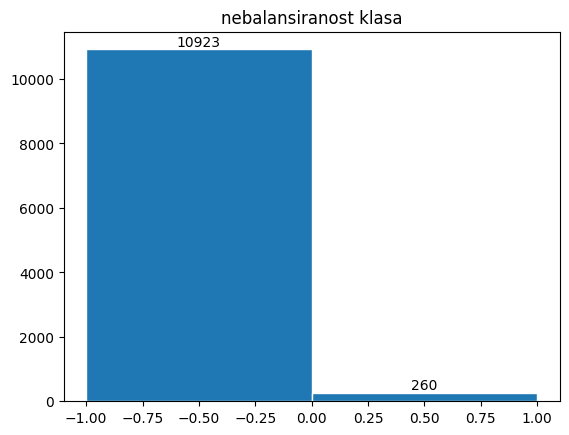

In [67]:
freq, bins, _ = plt.hist(y, edgecolor = 'white', bins = 2)

bin_centers = np.diff(bins) * 0.5 + bins[:-1]

for fr, x in zip(freq, bin_centers):
    fr = int(fr)
    plt.annotate(f'{fr}', xy = (x, fr), xytext = (0, 0.2), textcoords = 'offset points', ha = 'center', va = 'bottom')

plt.title('nebalansiranost klasa')
plt.show()

In [68]:
from sklearn.model_selection  import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 123)

In [70]:
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from termcolor import colored

In [71]:
def report_imbalanced(model, X, y, text = 'training'):
    y_pred = model.predict(X)

    print(colored(f'Classification report for model {type(model).__name__} on {text} data', 'green'))
    print(classification_report_imbalanced(y, y_pred, zero_division = True))

    print(colored(f'Confusion matrix for model {type(model).__name__} on {text} data', 'green'))
    print(pd.DataFrame(confusion_matrix(y, y_pred), index = ['B', 'M'], columns = ['B', 'M']))

    print('-'*100)



In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dtc = DecisionTreeClassifier(max_depth = 6, min_samples_split = 50, criterion = 'gini')

In [74]:
dtc.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,50
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [75]:
report_imbalanced(dtc, X_train, y_train)

Classification report for model DecisionTreeClassifier on training data
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      1.00      0.63      0.99      0.79      0.65      8192
          1       0.85      0.63      1.00      0.72      0.79      0.61       195

avg / total       0.99      0.99      0.64      0.99      0.79      0.65      8387

Confusion matrix for model DecisionTreeClassifier on training data
      B    M
B  8170   22
M    72  123
----------------------------------------------------------------------------------------------------


In [76]:
report_imbalanced(dtc, X_test, y_test, 'testing')

Classification report for model DecisionTreeClassifier on testing data
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      1.00      0.52      0.99      0.72      0.55      2731
          1       0.72      0.52      1.00      0.61      0.72      0.50        65

avg / total       0.98      0.98      0.53      0.98      0.72      0.54      2796

Confusion matrix for model DecisionTreeClassifier on testing data
      B   M
B  2718  13
M    31  34
----------------------------------------------------------------------------------------------------


In [77]:
dtc1 = DecisionTreeClassifier(max_depth = 6, min_samples_split = 50, criterion = 'gini', class_weight = 'balanced')
dtc1.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,50
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [78]:
report_imbalanced(dtc1, X_train, y_train)

Classification report for model DecisionTreeClassifier on training data
                   pre       rec       spe        f1       geo       iba       sup

         -1       1.00      0.96      0.94      0.98      0.95      0.91      8192
          1       0.36      0.94      0.96      0.52      0.95      0.90       195

avg / total       0.98      0.96      0.94      0.97      0.95      0.91      8387

Confusion matrix for model DecisionTreeClassifier on training data
      B    M
B  7860  332
M    11  184
----------------------------------------------------------------------------------------------------


In [79]:
report_imbalanced(dtc1, X_test, y_test, 'testing')

Classification report for model DecisionTreeClassifier on testing data
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      0.96      0.75      0.98      0.85      0.74      2731
          1       0.30      0.75      0.96      0.43      0.85      0.71        65

avg / total       0.98      0.95      0.76      0.96      0.85      0.74      2796

Confusion matrix for model DecisionTreeClassifier on testing data
      B    M
B  2618  113
M    16   49
----------------------------------------------------------------------------------------------------


In [80]:
from collections import Counter           # za brojanje instanci po klasama
from sklearn.decomposition import PCA


In [81]:
def resample(sampler, X, y):
    X_resampled, y_resampled = sampler.fit_resample(X, y)      # sempler pravi novi skup podataka
                                       # nauci statistiku + primeni semplovanje

    print(colored(f'Number of instances before resampling with {type(sampler).__name__} : {Counter(y).items()}', "green"))
    print(colored(f'Number of instances after  resampling with {type(sampler).__name__} : {Counter(y_resampled).items()}', "blue"))
    
    return X_resampled, y_resampled

In [82]:
def visualize(X, X_resampled, y, y_resampled, opacity = 0.5):
    pca = PCA(n_components = 2)
    pca.fit(X)

    X_pca = pca.transform(X)
    X_resampled_pca = pca.transform(X_resampled)

    fig = plt.figure(figsize = (20, 5))

    X = [X_pca, X_resampled_pca]
    Y = [y, y_resampled]

    for i in range(2):
        ax = plt.subplot(1, 2, i+1)
        colors = ['b' if y == -1 else 'r' for y in Y[i]]
        alpha = [opacity if y == -1 else 1 - opacity for y in Y[i]]

        plt.scatter(X[i][:, 0], X[i][:, 1], c = colors, alpha = alpha)
        plt.title(f'{'After' if i else 'Before'} resampling', c = 'blue' if i else 'green')
 
    plt.show() 

In [83]:
def train_and_evaluate_model(X_train, y_train, X_test, y_test):

    model = DecisionTreeClassifier(max_depth = 7, min_samples_split = 25, criterion = 'gini')
    model.fit(X_train, y_train)
    
    report_imbalanced(model, X_train, y_train)
    report_imbalanced(model, X_test, y_test, 'testing')
    
    return model

In [84]:
# over-sampling - generisemo nove instance klase koja ima manji broj clanova

# 1. random over sampling - slucajno uzorkobanje manjinske klase sa ponavljanjem

In [85]:
from imblearn.over_sampling import RandomOverSampler

In [86]:
ros = RandomOverSampler(random_state = 0, sampling_strategy = 'minority')
# nedostatak - samo smo povecali broj instanci a nismo dobili nove informacije o manjinskoj klasi

Number of instances before resampling with RandomOverSampler : dict_items([(-1, 8192), (1, 195)])
Number of instances after  resampling with RandomOverSampler : dict_items([(-1, 8192), (1, 8192)])


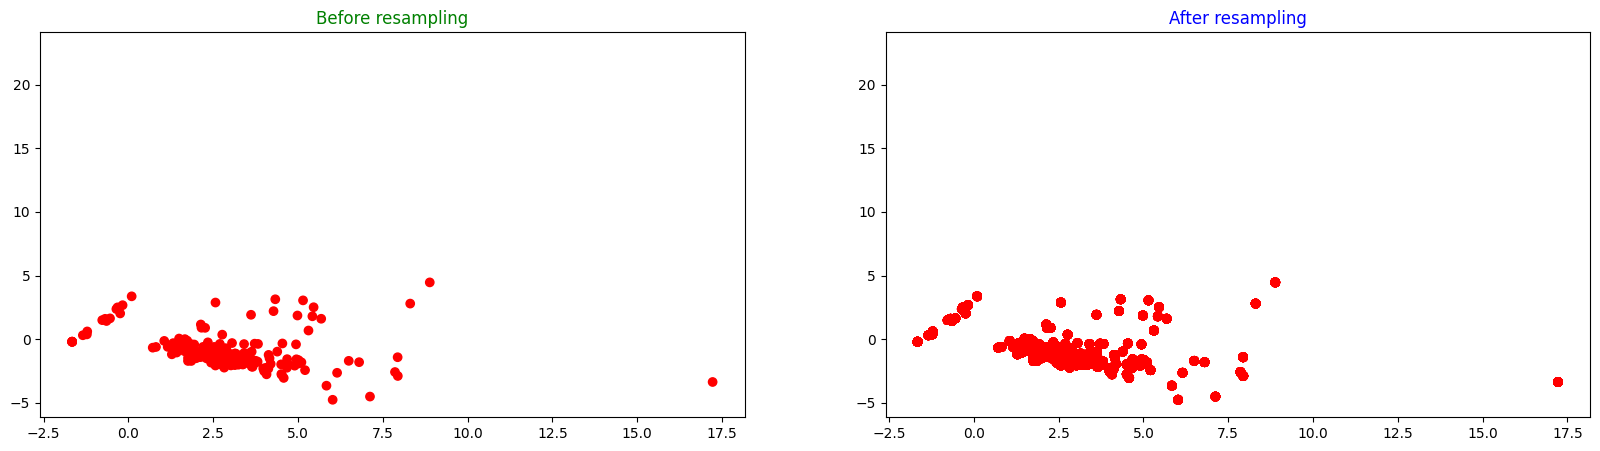

In [87]:
X_resampled, y_resampled = resample(ros, X_train, y_train)
visualize(X_train, X_resampled, y_train, y_resampled, 0)

In [88]:
model_ros = train_and_evaluate_model(X_resampled, y_resampled, X_test, y_test)

Classification report for model DecisionTreeClassifier on training data
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.93      0.97      0.93      0.95      0.95      0.90      8192
          1       0.97      0.93      0.97      0.95      0.95      0.89      8192

avg / total       0.95      0.95      0.95      0.95      0.95      0.90     16384

Confusion matrix for model DecisionTreeClassifier on training data
      B     M
B  7926   266
M   593  7599
----------------------------------------------------------------------------------------------------
Classification report for model DecisionTreeClassifier on testing data
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      0.97      0.71      0.98      0.83      0.70      2731
          1       0.35      0.71      0.97      0.47      0.83      0.67        65

avg / total       0.98      0.96      0.71      0.97      0.8

In [89]:
# 2. SMOTE - generise nove uzorke interpolacijom

In [90]:
from imblearn.over_sampling import SMOTE

In [91]:
smote = SMOTE(k_neighbors = 10, random_state = 123)
# dodali smo veliki broj informacija ali imamo potencijalno veliki broj sumova

Number of instances before resampling with SMOTE : dict_items([(-1, 8192), (1, 195)])
Number of instances after  resampling with SMOTE : dict_items([(-1, 8192), (1, 8192)])


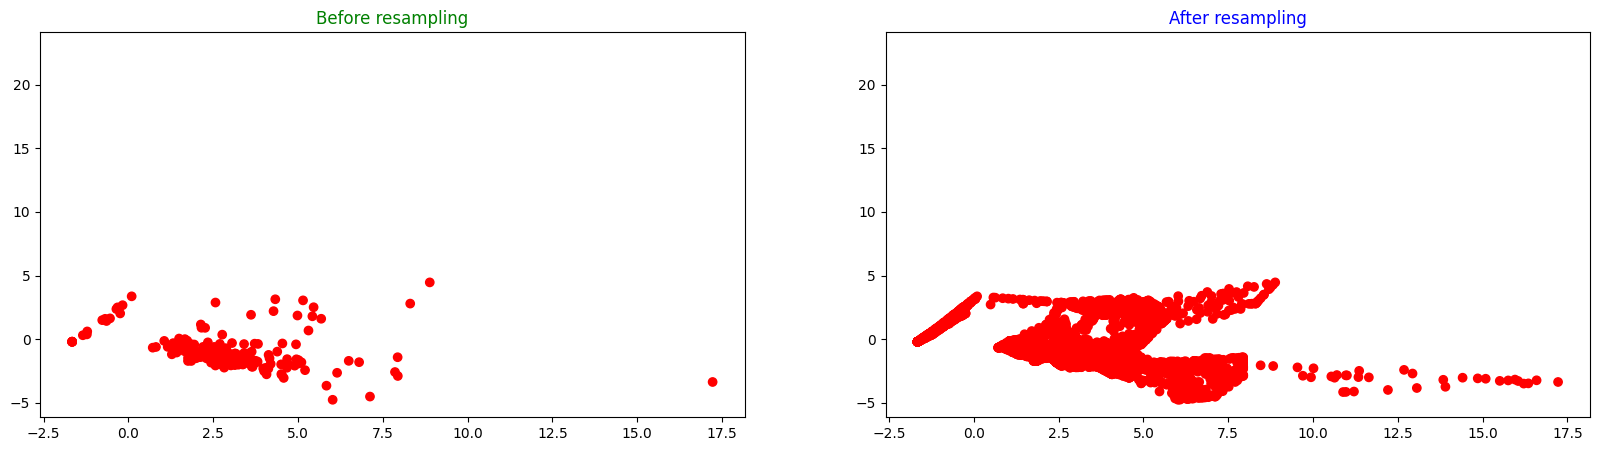

In [92]:
X_resampled, y_resampled = resample(smote, X_train, y_train)
visualize(X_train, X_resampled, y_train, y_resampled, 0)

In [93]:
model_smote = train_and_evaluate_model(X_resampled, y_resampled, X_test, y_test)

Classification report for model DecisionTreeClassifier on training data
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.95      0.96      0.95      0.95      0.95      0.91      8192
          1       0.96      0.95      0.96      0.95      0.95      0.91      8192

avg / total       0.95      0.95      0.95      0.95      0.95      0.91     16384

Confusion matrix for model DecisionTreeClassifier on training data
      B     M
B  7846   346
M   433  7759
----------------------------------------------------------------------------------------------------
Classification report for model DecisionTreeClassifier on testing data
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      0.96      0.77      0.98      0.86      0.75      2731
          1       0.31      0.77      0.96      0.44      0.86      0.72        65

avg / total       0.98      0.95      0.77      0.96      0.8

In [94]:
# under - sampling - uzorkovanjem smanjujemo broj instanci vecinske klase

# 1. random under sampling 

In [95]:
from imblearn.under_sampling import RandomUnderSampler

In [96]:
rus = RandomUnderSampler()

Number of instances before resampling with RandomUnderSampler : dict_items([(-1, 8192), (1, 195)])
Number of instances after  resampling with RandomUnderSampler : dict_items([(-1, 195), (1, 195)])


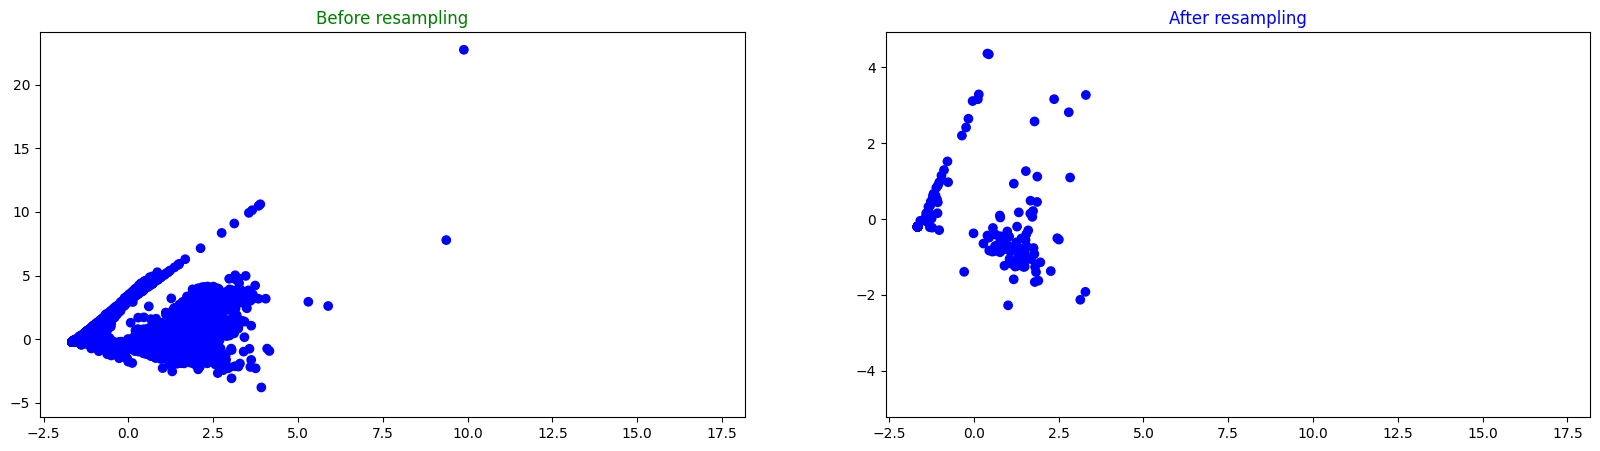

In [97]:
X_resampled, y_resampled = resample(rus, X_train, y_train)
visualize(X_train, X_resampled, y_train, y_resampled, 1)

In [98]:
model_rus = train_and_evaluate_model(X_resampled, y_resampled, X_test, y_test)

Classification report for model DecisionTreeClassifier on training data
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.93      0.91      0.93      0.92      0.92      0.84       195
          1       0.91      0.93      0.91      0.92      0.92      0.84       195

avg / total       0.92      0.92      0.92      0.92      0.92      0.84       390

Confusion matrix for model DecisionTreeClassifier on training data
     B    M
B  177   18
M   14  181
----------------------------------------------------------------------------------------------------
Classification report for model DecisionTreeClassifier on testing data
                   pre       rec       spe        f1       geo       iba       sup

         -1       1.00      0.84      0.88      0.91      0.86      0.73      2731
          1       0.11      0.88      0.84      0.20      0.86      0.74        65

avg / total       0.98      0.84      0.88      0.89      0.86     

In [99]:
# 2. near miss - najbolje tehnike za under - sampling, osetljive na sum 1 -> 2 -> 3 opadajuce

from imblearn.under_sampling import NearMiss

Number of instances before resampling with NearMiss : dict_items([(-1, 8192), (1, 195)])
Number of instances after  resampling with NearMiss : dict_items([(-1, 195), (1, 195)])


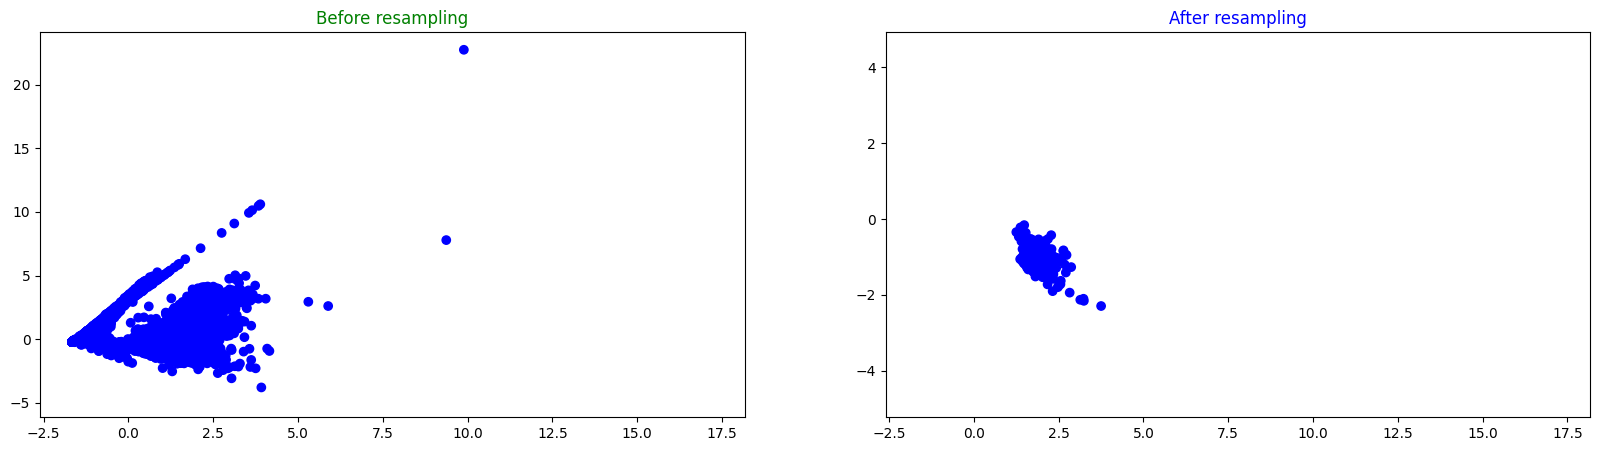

Classification report for model DecisionTreeClassifier on training data
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.84      0.96      0.82      0.90      0.89      0.80       195
          1       0.96      0.82      0.96      0.88      0.89      0.78       195

avg / total       0.90      0.89      0.89      0.89      0.89      0.79       390

Confusion matrix for model DecisionTreeClassifier on training data
     B    M
B  188    7
M   35  160
----------------------------------------------------------------------------------------------------
Classification report for model DecisionTreeClassifier on testing data
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.95      0.12      0.74      0.21      0.30      0.08      2731
          1       0.02      0.74      0.12      0.04      0.30      0.09        65

avg / total       0.93      0.13      0.72      0.21      0.30     

In [100]:
# k najblizih
nm1 = NearMiss(version = 1, n_neighbors = 20)
X_resampled, y_resampled = resample(nm1, X_train, y_train)
visualize(X_train, X_resampled, y_train, y_resampled, 1)
model_nm1 = train_and_evaluate_model(X_resampled, y_resampled, X_test, y_test)

Number of instances before resampling with NearMiss : dict_items([(-1, 8192), (1, 195)])
Number of instances after  resampling with NearMiss : dict_items([(-1, 195), (1, 195)])


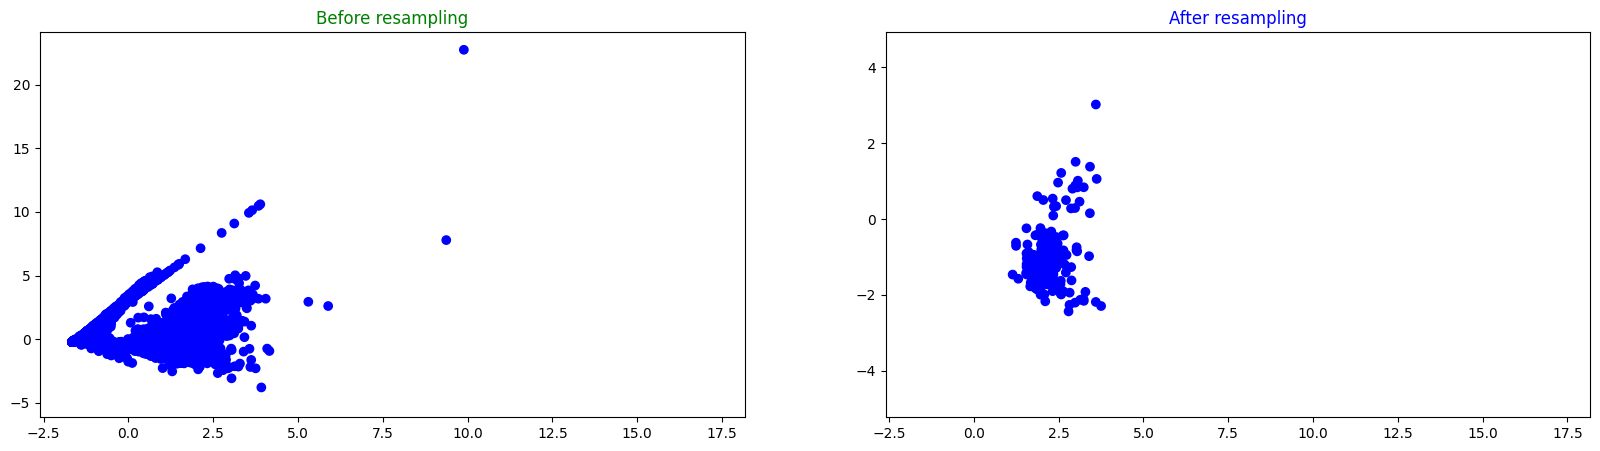

Classification report for model DecisionTreeClassifier on training data
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.93      0.97      0.93      0.95      0.95      0.90       195
          1       0.97      0.93      0.97      0.95      0.95      0.90       195

avg / total       0.95      0.95      0.95      0.95      0.95      0.90       390

Confusion matrix for model DecisionTreeClassifier on training data
     B    M
B  189    6
M   14  181
----------------------------------------------------------------------------------------------------
Classification report for model DecisionTreeClassifier on testing data
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.93      0.03      0.89      0.07      0.17      0.03      2731
          1       0.02      0.89      0.03      0.04      0.17      0.03        65

avg / total       0.91      0.05      0.87      0.07      0.17     

In [101]:
# k najdaljih
nm2 = NearMiss(version = 2, n_neighbors = 20)
X_resampled, y_resampled = resample(nm2, X_train, y_train)
visualize(X_train, X_resampled, y_train, y_resampled, 1)
model_nm2 = train_and_evaluate_model(X_resampled, y_resampled, X_test, y_test)

Number of instances before resampling with NearMiss : dict_items([(-1, 8192), (1, 195)])
Number of instances after  resampling with NearMiss : dict_items([(-1, 195), (1, 195)])


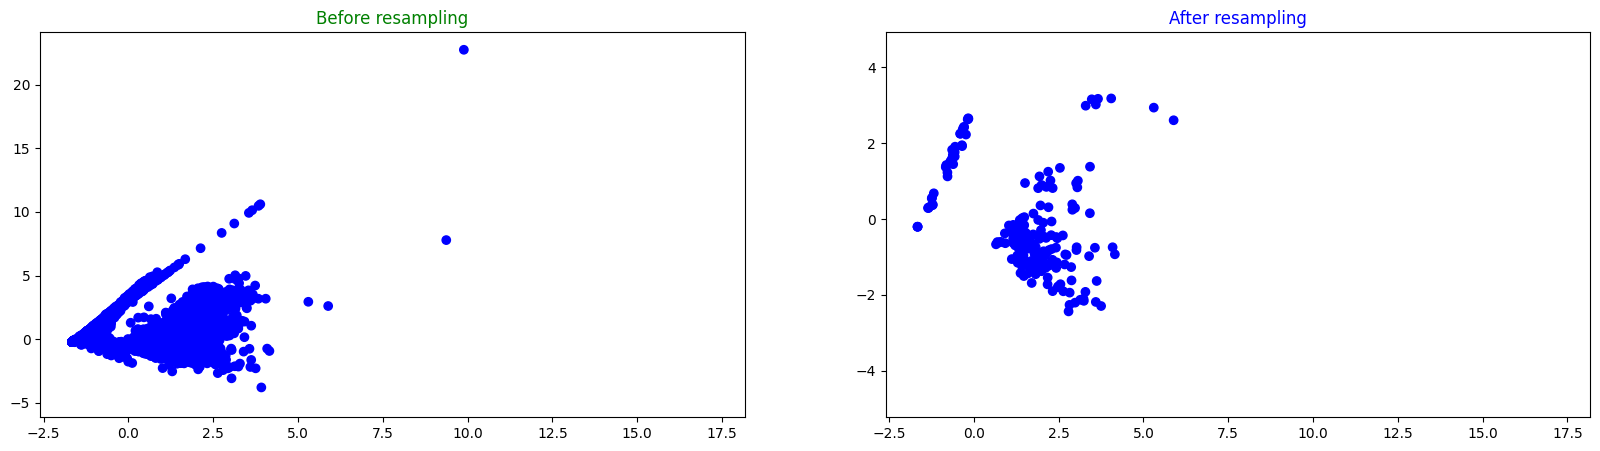

Classification report for model DecisionTreeClassifier on training data
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.78      0.94      0.73      0.85      0.83      0.70       195
          1       0.92      0.73      0.94      0.81      0.83      0.67       195

avg / total       0.85      0.83      0.83      0.83      0.83      0.68       390

Confusion matrix for model DecisionTreeClassifier on training data
     B    M
B  183   12
M   53  142
----------------------------------------------------------------------------------------------------
Classification report for model DecisionTreeClassifier on testing data
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.98      0.59      0.62      0.74      0.60      0.36      2731
          1       0.03      0.62      0.59      0.07      0.60      0.36        65

avg / total       0.96      0.59      0.61      0.72      0.60     

In [102]:
# 2 koraka - k najblizih, pa k najdaljih
nm3 = NearMiss(version = 3, n_neighbors = 20)
X_resampled, y_resampled = resample(nm3, X_train, y_train)
visualize(X_train, X_resampled, y_train, y_resampled, 1)
model_nm3 = train_and_evaluate_model(X_resampled, y_resampled, X_test, y_test)

In [103]:
# condense nearest neighbour - osetljiv na sum i dodaje sum u podatke

In [104]:
from imblearn.under_sampling import CondensedNearestNeighbour

Number of instances before resampling with CondensedNearestNeighbour : dict_items([(-1, 8192), (1, 195)])
Number of instances after  resampling with CondensedNearestNeighbour : dict_items([(-1, 191), (1, 195)])


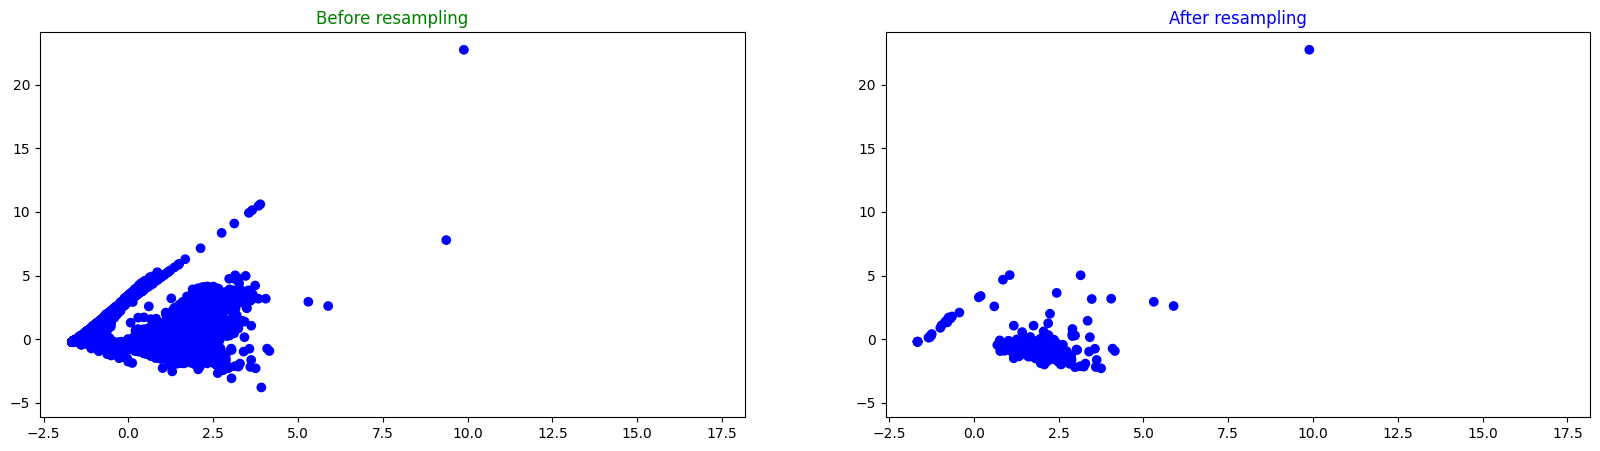

Classification report for model DecisionTreeClassifier on training data
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.81      0.80      0.82      0.81      0.81      0.66       191
          1       0.81      0.82      0.80      0.81      0.81      0.66       195

avg / total       0.81      0.81      0.81      0.81      0.81      0.66       386

Confusion matrix for model DecisionTreeClassifier on training data
     B    M
B  153   38
M   35  160
----------------------------------------------------------------------------------------------------
Classification report for model DecisionTreeClassifier on testing data
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.98      0.50      0.66      0.66      0.57      0.32      2731
          1       0.03      0.66      0.50      0.06      0.57      0.33        65

avg / total       0.96      0.50      0.66      0.65      0.57     

In [105]:
cnn = CondensedNearestNeighbour(random_state = 0, n_neighbors = 10, sampling_strategy = 'majority')
X_resampled, y_resampled = resample(cnn, X_train, y_train)
visualize(X_train, X_resampled, y_train, y_resampled, 1)
model_cnn = train_and_evaluate_model(X_resampled, y_resampled, X_test, y_test)

In [106]:
# SMOTEENN - kombinacija over i under sampling - a

In [107]:
from imblearn.combine import SMOTEENN

Number of instances before resampling with SMOTEENN : dict_items([(-1, 8192), (1, 195)])
Number of instances after  resampling with SMOTEENN : dict_items([(-1, 7777), (1, 7916)])


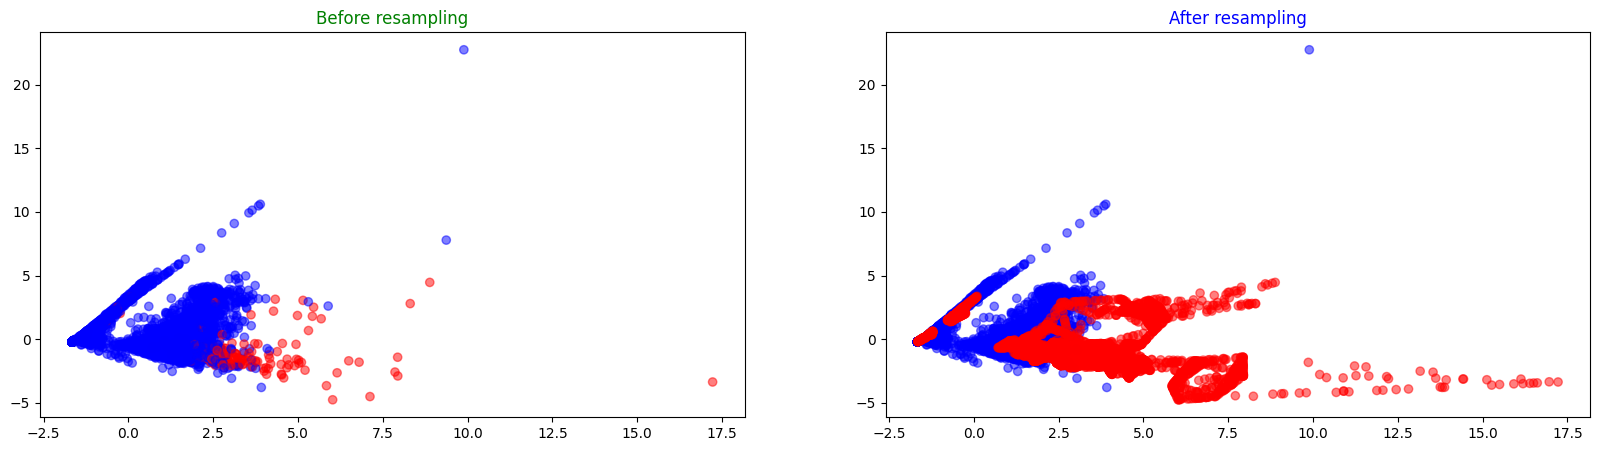

Classification report for model DecisionTreeClassifier on training data
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.97      0.99      0.97      0.98      0.98      0.96      7777
          1       0.99      0.97      0.99      0.98      0.98      0.96      7916

avg / total       0.98      0.98      0.98      0.98      0.98      0.96     15693

Confusion matrix for model DecisionTreeClassifier on training data
      B     M
B  7677   100
M   219  7697
----------------------------------------------------------------------------------------------------
Classification report for model DecisionTreeClassifier on testing data
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      0.97      0.74      0.98      0.84      0.73      2731
          1       0.34      0.74      0.97      0.47      0.84      0.70        65

avg / total       0.98      0.96      0.74      0.97      0.8

In [108]:
s = SMOTEENN(random_state = 0, sampling_strategy = 'auto')
X_resampled, y_resampled = resample(s, X_train, y_train)
visualize(X_train, X_resampled, y_train, y_resampled, 0.5)
model_s = train_and_evaluate_model(X_resampled, y_resampled, X_test, y_test)

In [109]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [110]:
model = BalancedRandomForestClassifier(max_depth = 6, random_state = 123, max_samples = 20)

In [111]:
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [112]:
report_imbalanced(model, X_train, y_train)

Classification report for model BalancedRandomForestClassifier on training data
                   pre       rec       spe        f1       geo       iba       sup

         -1       1.00      0.96      0.92      0.98      0.94      0.89      8192
          1       0.35      0.92      0.96      0.50      0.94      0.88       195

avg / total       0.98      0.96      0.92      0.97      0.94      0.89      8387

Confusion matrix for model BalancedRandomForestClassifier on training data
      B    M
B  7854  338
M    15  180
----------------------------------------------------------------------------------------------------


In [113]:
report_imbalanced(model, X_test, y_test, "testing")

Classification report for model BalancedRandomForestClassifier on testing data
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      0.95      0.77      0.97      0.86      0.75      2731
          1       0.28      0.77      0.95      0.41      0.86      0.72        65

avg / total       0.98      0.95      0.77      0.96      0.86      0.75      2796

Confusion matrix for model BalancedRandomForestClassifier on testing data
      B    M
B  2603  128
M    15   50
----------------------------------------------------------------------------------------------------


In [ ]:
# PR kriva = Precision-Recall kriva - pokazuje odnos izmedju ove dve mere
# sto veci aps model je bolji

In [115]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

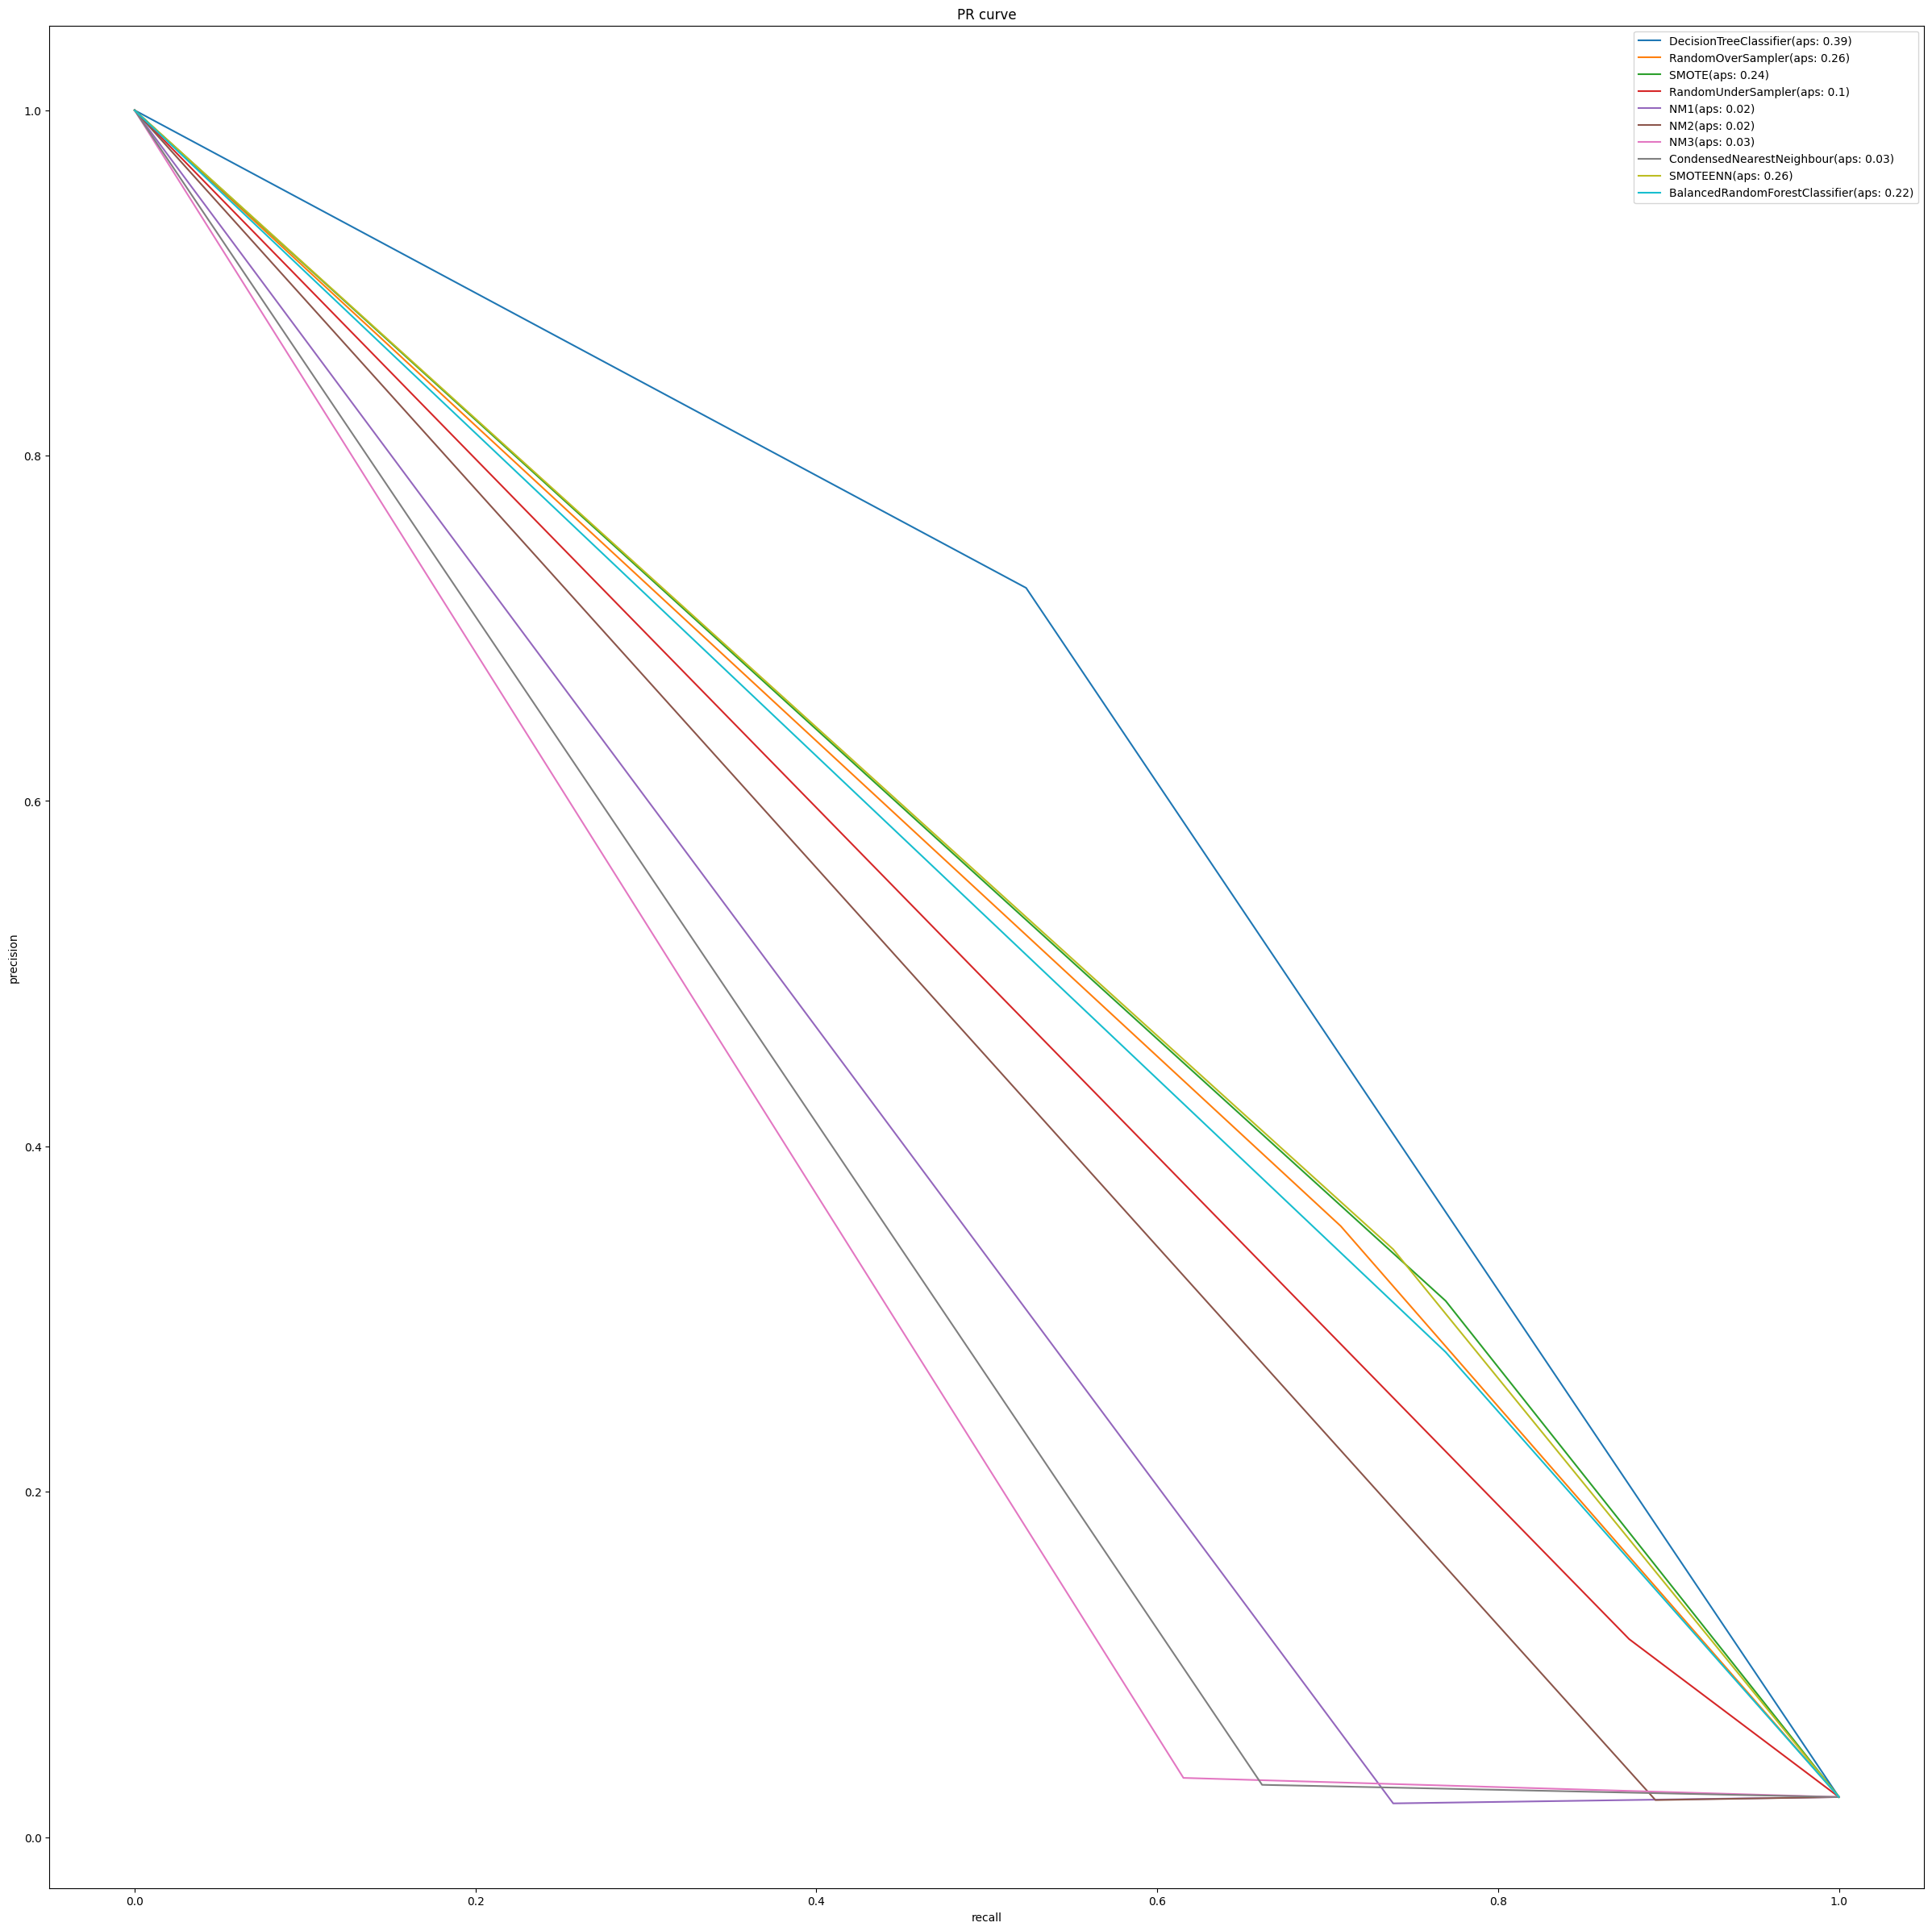

In [118]:
models = [dtc, model_ros, model_smote, model_rus, model_nm1, model_nm2, model_nm3, model_cnn, model_s, model]
models_name = ['DecisionTreeClassifier', 'RandomOverSampler', 'SMOTE', 'RandomUnderSampler', 'NM1', 'NM2', 'NM3', 'CondensedNearestNeighbour', 'SMOTEENN', 'BalancedRandomForestClassifier']

plt.figure(figsize = (30, 30))

for m, m_name in zip(models, models_name):
    y_pred = m.predict(X_test)
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    aps = average_precision_score(y_test, y_pred)

    plt.plot(recall, precision, label = m_name + "(aps: " + str(round(aps, 2)) + ")")

plt.xlabel('recall')
plt.ylabel('precision')

plt.title('PR curve')
plt.legend()
plt.show()

In [119]:
from sklearn.metrics import roc_auc_score, roc_curve

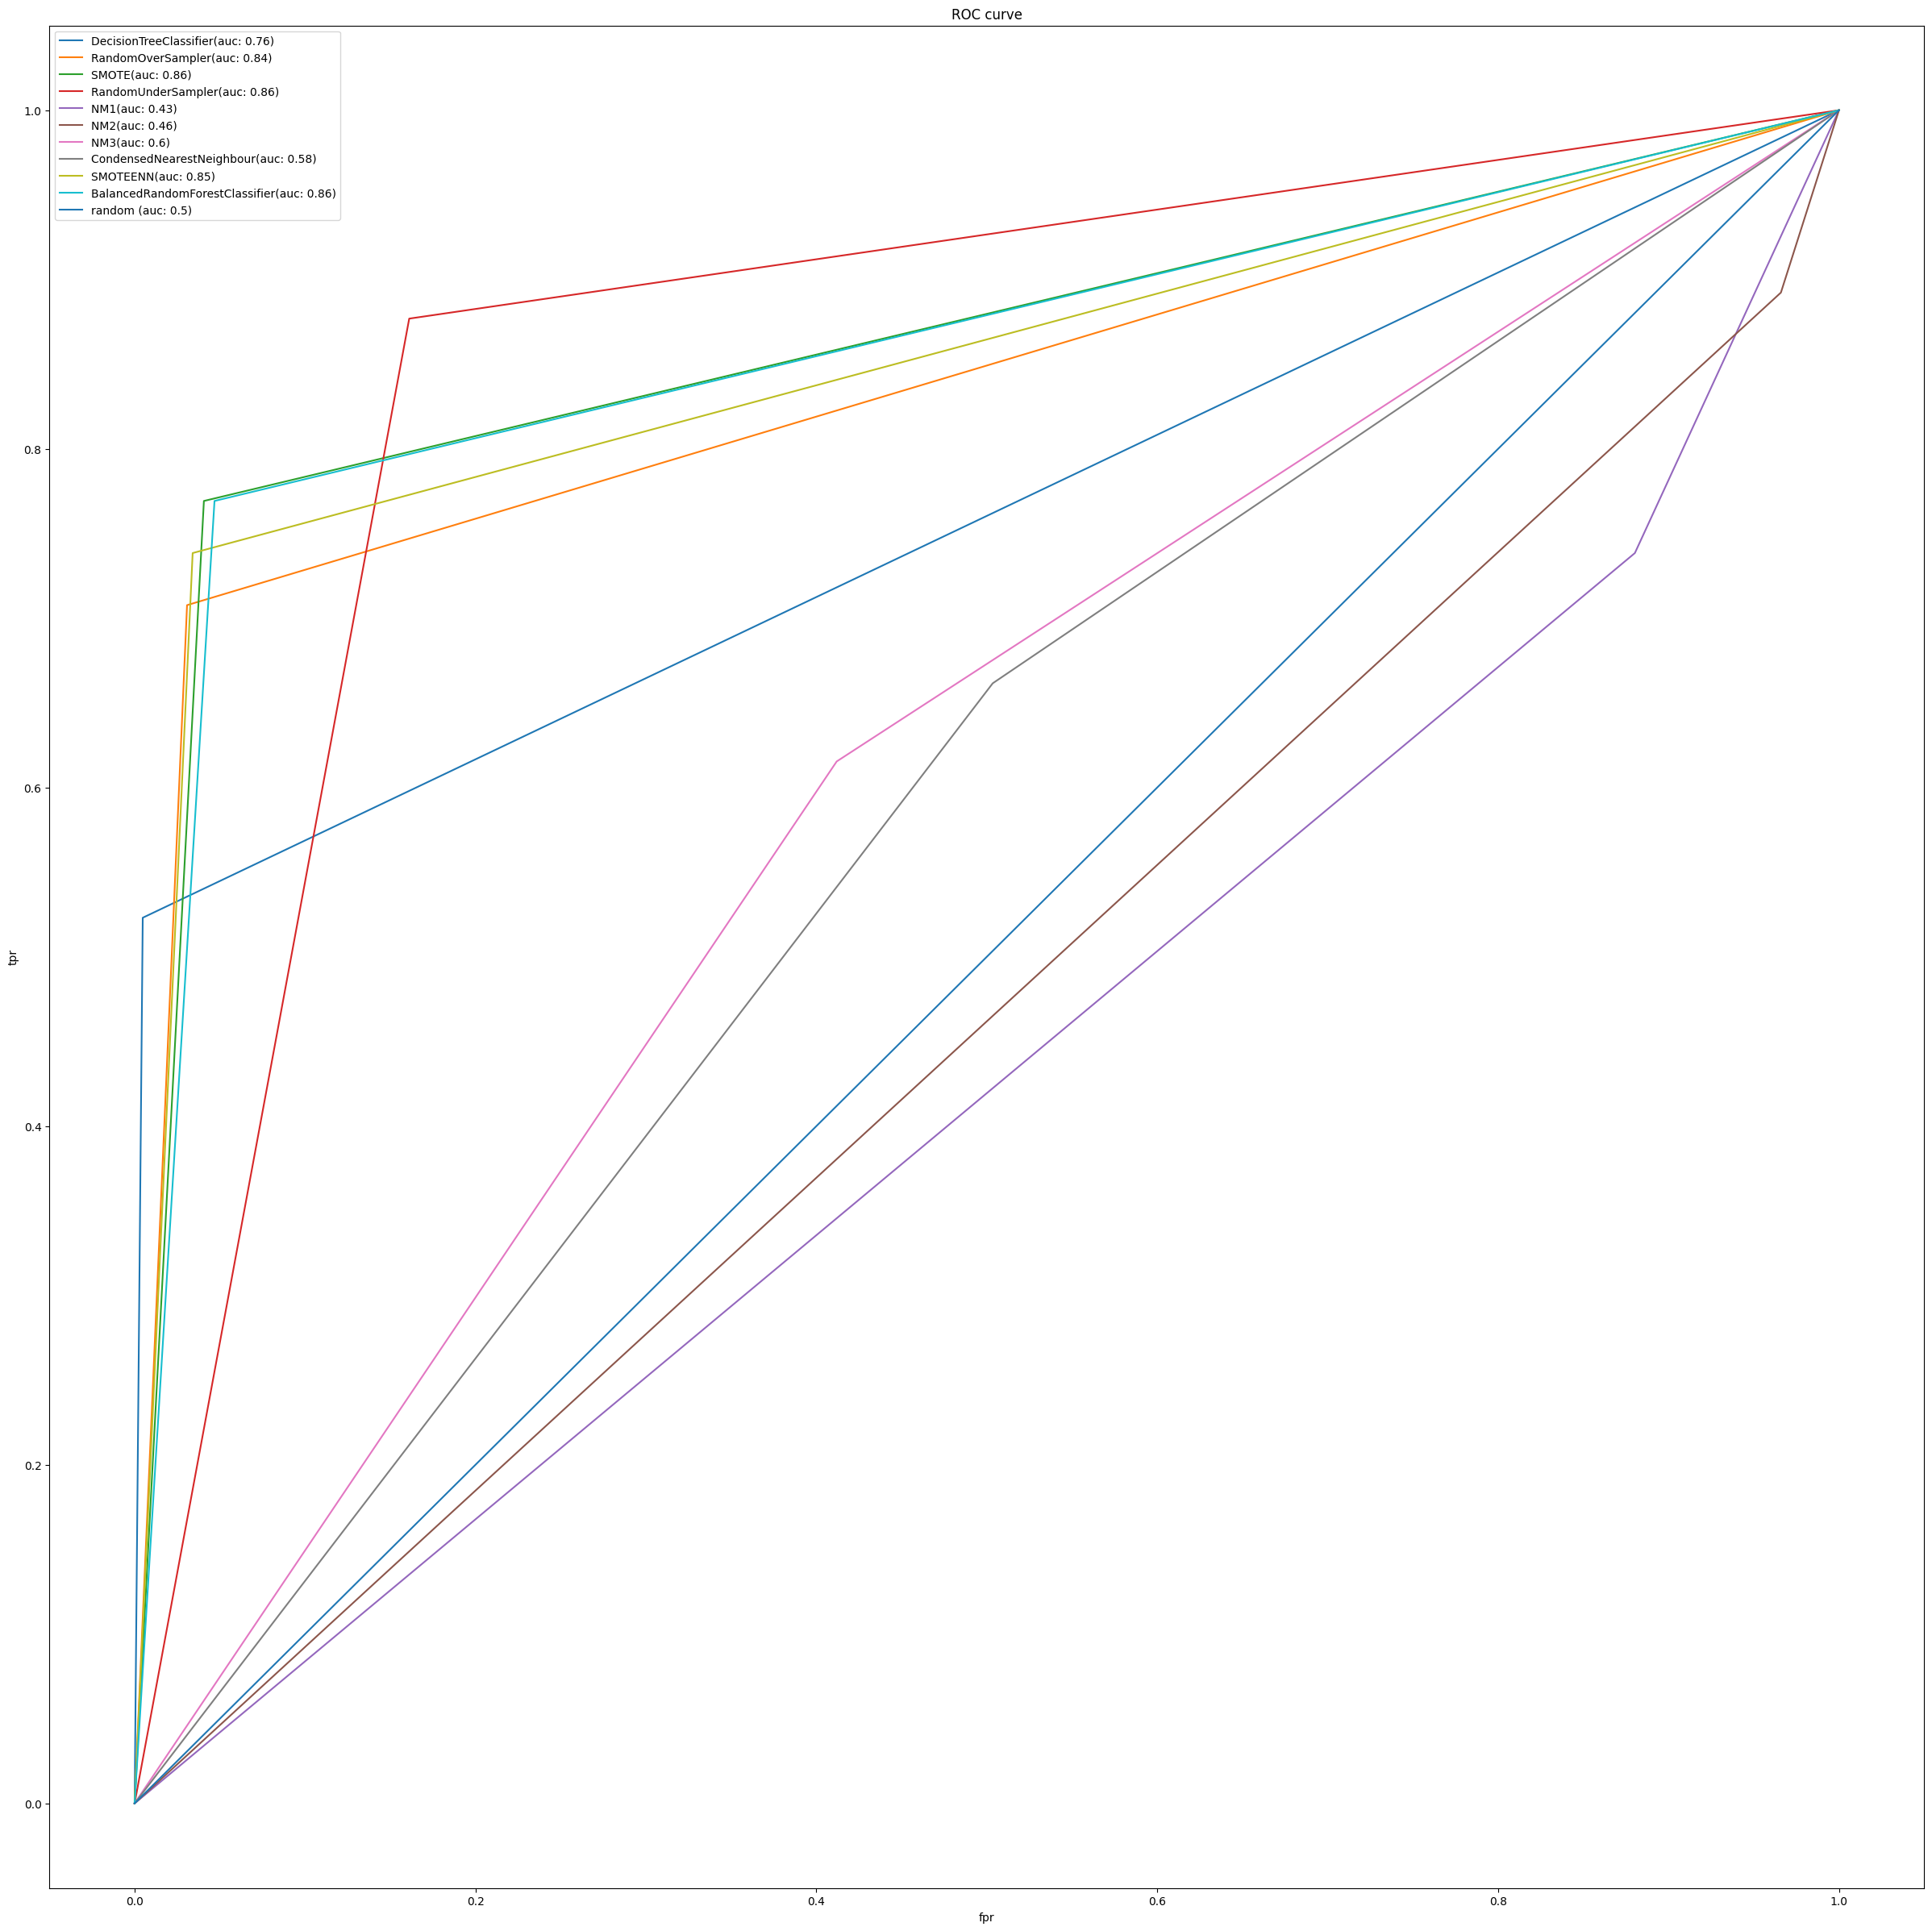

In [121]:
plt.figure(figsize = (30, 30))

for m, m_name in zip(models, models_name):
    y_pred = m.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    plt.plot(fpr, tpr, label = m_name + "(auc: " + str(round(auc, 2)) + ")")

plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot([0, 1], [0, 1], label = "random (auc: 0.5)")
plt.title('ROC curve')
plt.legend()
plt.show()